In [16]:
# The code was removed by Watson Studio for sharing.

,Date,BTC Open,BTC Close,BTC Volume,TESLA Open,TESLA Close,TESLA Volume,NASDAQ Open,NASDAQ Close,NASDAQ Volume,Disaster,Day of Week,day
0,2021-12-31,47207.99,46806.83,1591.712555,1073.439941,1056.780029,13528700.0,15722.910156,15644.969727,3.379850e+09,0.0,Friday,0
1,2021-12-30,46502.44,47207.99,998.412250,1061.329956,1070.339966,15680300.0,15758.980469,15741.559570,3.732730e+09,0.0,Thursday,2
2,2021-12-29,48017.93,46502.44,1119.628142,1098.640015,1086.189941,18718000.0,15794.919922,15766.219727,3.694500e+09,0.0,Wednesday,4
3,2021-12-28,49821.79,48017.93,1275.007551,1109.489990,1088.469971,20108000.0,15895.200195,15781.719727,3.623600e+09,0.0,Tuesday,3
4,2021-12-27,51036.12,49821.79,896.042079,1073.670044,1093.939941,23715300.0,15696.830078,15871.259766,3.730120e+09,0.0,Monday,1


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In [64]:
X = df[['TESLA Open', 'TESLA Volume', 'NASDAQ Open', 'NASDAQ Volume', 'Disaster', 'day']]
y = df['BTC Close']

In [65]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Machine learning algorithms: Support Vector Machine, Linear Regression, Gradient Boosting Regression, Stochastic Gradient Descent

First off, I trained the support vector machine. The SVM was the worst algorithm when comparing RMSE and MAE.

In [68]:
# best C = 10
# best max_iter = 10

svm_reg = make_pipeline(StandardScaler(),
                        PCA(n_components=5),
                        LinearSVR(random_state=42))

parameters = {'linearsvr__max_iter':(10, 20, 50, 100), 'linearsvr__C':[1, 5, 10]}
clf = GridSearchCV(svm_reg, parameters)
clf.fit(x_train, y_train)
pred_svm = clf.predict(x_test)
print(clf.best_params_)
rmse_svm = mean_squared_error(y_test, pred_svm, squared=False)
mae_svm = mean_absolute_error(y_test, pred_svm)
print(rmse_svm)
print(mae_svm)

{'linearsvr__C': 10, 'linearsvr__max_iter': 10}
12209.284217834474
6323.922787884493


Next I trained the Linear Regression model which was a vast improvement over the SVM, but not the best.

In [69]:
# best C = 10
# best max_iter = 10

lin_reg = make_pipeline(StandardScaler(),
                        PCA(n_components=5),
                        LinearRegression())
lin_reg.fit(x_train, y_train)
pred_lin = lin_reg.predict(x_test)
print(clf.best_params_)
rmse_lin = mean_squared_error(y_test, pred_lin, squared=False)
mae_lin = mean_absolute_error(y_test, pred_lin)
print(rmse_lin)
print(mae_lin)

{'linearsvr__C': 10, 'linearsvr__max_iter': 10}
6141.695933328104
3912.464934999993


The next model was the Gradient Boosting Regressor. This model did the best in terms of both RMSE and MAE.

In [70]:
# best learning_rate = 0.1
# best max_depth = 3
# best n_estimators = 100

boost_reg = make_pipeline(StandardScaler(),
#                          PCA(n_components=5),
                        GradientBoostingRegressor(random_state=42))
#parameters = {'gradientboostingregressor__learning_rate':[0.1, 0.01], 'gradientboostingregressor__n_estimators':[100, 1000, 2500],
#             'gradientboostingregressor__max_depth':[3, 15, 30, 50]}

parameters = {'gradientboostingregressor__learning_rate':[0.1], 'gradientboostingregressor__n_estimators':[100],
             'gradientboostingregressor__max_depth':[3]}
clf = GridSearchCV(boost_reg, parameters)
clf.fit(x_train, y_train)
pred_boost = clf.predict(x_test)
print(clf.best_params_)
rmse_boost = mean_squared_error(y_test, pred_boost, squared=False)
mae_boost = mean_absolute_error(y_test, pred_boost)
print(rmse_boost)
print(mae_boost)

{'gradientboostingregressor__learning_rate': 0.1, 'gradientboostingregressor__max_depth': 3, 'gradientboostingregressor__n_estimators': 100}
2675.4615827684665
1587.2588633376267


The final model I trained was Stochastic Gradient Descent. This model did similarly to the linear regression, but not better than the gradient boosting.

In [71]:
# best max_iter = 100
# best penalty = l1

sgd_reg = make_pipeline(StandardScaler(),
                        PCA(n_components=5),
                        SGDRegressor(random_state=42))
parameters = {'sgdregressor__penalty': ['l2', 'l1', 'elasticnet'], 'sgdregressor__max_iter':[100, 250, 500, 1000, 2500]}
clf = GridSearchCV(sgd_reg, parameters)
clf.fit(x_train, y_train)
pred_sgd = clf.predict(x_test)
print(clf.best_params_)
rmse_sgd = mean_squared_error(y_test, pred_sgd, squared=False)
mae_sgd = mean_absolute_error(y_test, pred_sgd)
print(rmse_sgd)
print(mae_sgd)

{'sgdregressor__max_iter': 100, 'sgdregressor__penalty': 'l1'}
6152.450413587761
3925.948533086649


In [13]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

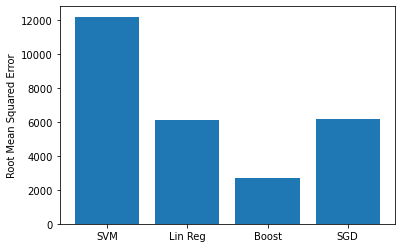

In [72]:
data = [rmse_svm, rmse_lin, rmse_boost, rmse_sgd]
yaxis = ['SVM', 'Lin Reg', 'Boost', 'SGD']
plt.bar(yaxis, data)
plt.ylabel('Root Mean Squared Error')
plt.title('')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

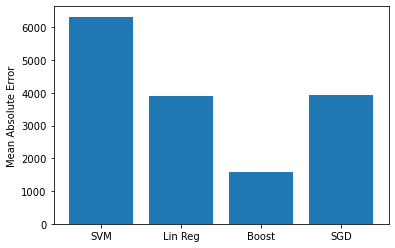

In [73]:
data = [mae_svm, mae_lin, mae_boost, mae_sgd]
yaxis = ['SVM', 'Lin Reg', 'Boost', 'SGD']
plt.bar(yaxis, data)
plt.ylabel('Mean Absolute Error')
plt.title('')
plt.show